### SVM (Support Verctor Machine)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 로드
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=.2, random_state=42)

In [4]:
# 모델 학습 및 평가
from sklearn.svm import SVC
model = SVC(kernel ='linear')
# 데이터가 선형적으로 분리 가능하고, 그렇게 분리하고 싶어서
model.fit(X_train, y_train)
model.kernel
# 어떤 커널 함수 사용했는지 반환. defalut는 rbf

print(model.score(X_train, y_train), model.score(X_test, y_test))
# kernel ='linear': 0.975 1.0
# kernel ='rbf' : 위와 일치

0.975 1.0


In [5]:
# 초평면 시각화
# 특성 4개 중 2개만 이용해 초평면 구하고 그래프로 나타낼 것
df = pd.DataFrame(iris_data.data[:, :2], columns=iris_data.feature_names[:2])
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [6]:
# 훈련 - 검사 데이터 분리
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

In [7]:
# 모델 학습 및 평가
svm_clf = SVC(kernel='linear', C=1000.0)

svm_clf.fit(X_train, y_train)

svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)
# C=1.0 : (0.8, 0.9)
# C=0.001 : (0.3416666666666667, 0.3)

(0.7833333333333333, 0.9)

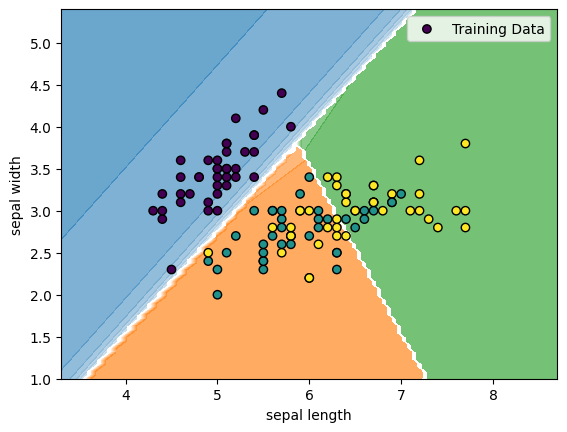

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
# 결정 경계 보여주는 클래스

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

# 훈련 데이터 산점도
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', label='Training Data')
# c: 정답 데이터에 대한 점의 색깔 구분
# edgecolors = 'k' : 점의 테두리를 검정색으로 함
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# 세 개의 꽃으로 구분하므로 영역도 세 개.

In [9]:
# rbf 커널 사용 시각화
svm_clf = SVC(kernel='rbf', C=1.0, gamma=.5)
# gamma: 유사도를 조사해서 계산. 값이 클수록 복잡한 결정 경계 만듦.

svm_clf.fit(X_train, y_train)

svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.7916666666666666, 0.9)

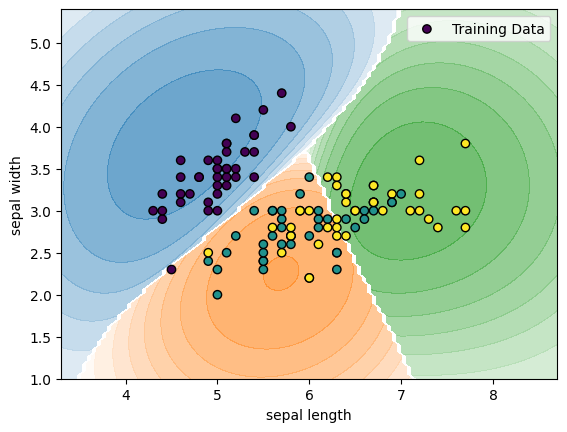

In [10]:
# rbf 결정 경계 시각화
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

# 훈련 데이터 산점도
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', label='Training Data')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()


### SVR (Support Verctor Regressor)

| 특징                   | SVC                                    | SVR                                    |
|----------------------|---------------------------------------|---------------------------------------|
| **목적**              | 이진 분류 문제 해결                   | 연속적인 값 예측                      |
| **결정 경계**         | 서포트 벡터와의 거리를 최대화하여 생성 | 데이터 포인트와의 오차를 최소화하여 생성 |
| **마진/허용 오차**    | 마진을 최대화하여 일반화 성능 향상    | ε 매개변수로 허용 오차 범위 설정       |
| **결과**              | 클래스 예측 (이진 분류)               | 연속적인 값 예측                      |


**작동 원리**

1. **𝜖-튜브(엡실론 튜브)**
   - 데이터 포인트와 예측 값 사이의 허용 오차 범위를 정의
   - 𝜖(엡실론 튜브) : 값을 기준으로 오차가 범위 내에 있으면 무시, 범위를 벗어나면 벌칙(Penalty)을 부여

2. **최적화 목표**
   - 𝜖-튜브 내부에 데이터를 포함하면서, 오차를 최소화하고 마진(Margin)을 최대화

3. **커널 트릭**
   - 비선형 데이터를 고차원 공간으로 매핑하여 선형적으로 해결 가능

In [11]:
# 데이터 준비
np.random.seed(0)

X=np.sort(np.random.rand(40, 1) * 5, axis=0)
# 0~1, 40개 생성. 오름차순 정렬
y=np.sin(X).ravel() + np.random.randn(40) * 0.1
# y=sin(X)에 작은 noise값 추가
# ravel(): 1차원으로 내림

X_test = np.linspace(0, 5, 100).reshape(-1, 1)

In [12]:
# X, X_test, y, y_test = train_test_split(X, y)

In [13]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
# epsilon의 default값: 0.1

# 학습
svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

# 예측
pred_rbf = svr_rbf.predict(X_test)
pred_lin = svr_lin.predict(X_test)
pred_poly = svr_poly.predict(X_test)

# print(pred_rbf, pred_lin, pred_poly)

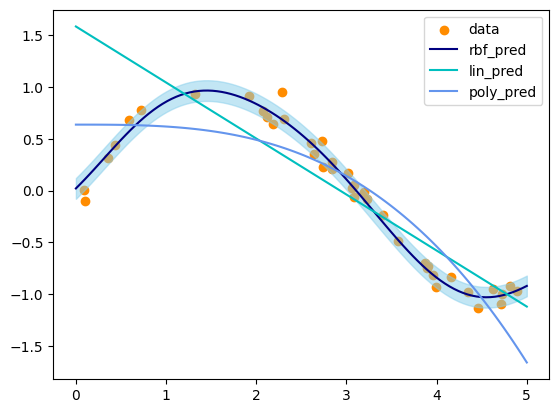

In [14]:
# 결과 시각화
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(X_test, pred_rbf, color='navy', label='rbf_pred')
plt.plot(X_test, pred_lin, color='c', label='lin_pred')
plt.plot(X_test, pred_poly, color='cornflowerblue', label='poly_pred')

# epsilon 오차 범위 시각화
svr_rbf_epsilon = svr_rbf.epsilon
epsilon_upper = pred_rbf + svr_rbf_epsilon
epsilon_lower = pred_rbf - svr_rbf_epsilon
plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color='skyblue', alpha=0.5)

plt.legend()
plt.show()

(실습-완료)
##### 캘리포니아 주택 가격 예측

In [ ]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

housing_data = fetch_california_housing()

# 데이터 분리 및 스케일링
X = housing_data.data
y = housing_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

std_scl = StandardScaler()
X_train_scaled = std_scl.fit_transform(X_train)
X_test_scaled = std_scl.transform(X_test)


# SVR 모델 사용해 훈련 - 평가

# svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
# svr_poly = SVR(kernel='poly')

In [ ]:
# 학습
# svr_rbf.fit(X_train_scaled, y_train)
svr_lin.fit(X_train_scaled, y_train)
# svr_poly.fit(X_train_scaled, y_train)

# 20분 넘겨서 걍 컷

In [21]:
# # 평가
# print(svr_rbf.score(X_train_scaled, y_train), svr_rbf.score(X_test_scaled, y_test))
# print(svr_lin.score(X_train_scaled, y_train), svr_lin.score(X_test_scaled, y_test))
# print(svr_poly.score(X_train_scaled, y_train), svr_poly.score(X_test_scaled, y_test))

0.1429363096677837 -2.5514591714480774


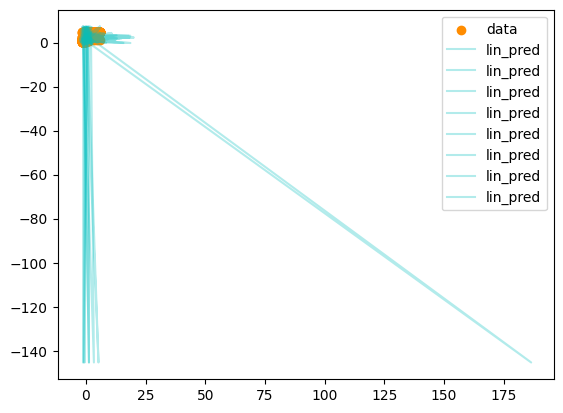

In [34]:
# 예측
# pred_rbf = svr_rbf.predict(X_test)
# pred_lin = svr_lin.predict(X_test_scaled)
# pred_poly = svr_poly.predict(X_test)


# 결과 시각화
plt.scatter(X_test_scaled[:, 0], y_test, color='darkorange', label='data')

# plt.plot(X_test, pred_rbf, color='navy', label='rbf_pred')
plt.plot(X_test_scaled, pred_lin, color='c', label='lin_pred', alpha=.3)
# plt.plot(X_test, pred_poly, color='cornflowerblue', label='poly_pred')

# epsilon 오차 범위 시각화f
svr_lin_epsilon = svr_lin.epsilon
epsilon_upper = pred_lin + svr_lin_epsilon
epsilon_lower = pred_lin - svr_lin_epsilon
# plt.fill_between(X_test_scaled.ravel(), epsilon_lower, epsilon_upper, color='skyblue', alpha=0.5)

plt.legend()
plt.show()